In [84]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline




In [85]:
ruta = '../data/processed/Ricedataprocesada.csv'

In [86]:
data_arroz=pd.read_csv(ruta)

In [87]:
data_arroz

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,1
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,1
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,1
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,1


In [88]:
data_arroz.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

Features (X) y target(y)

In [89]:
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent']

X = data_arroz[features]
y = data_arroz['Class']

In [90]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024
...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064


In [91]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3805    1
3806    1
3807    1
3808    1
3809    1
Name: Class, Length: 3810, dtype: int64

Datos de entrenamiento(X_train y_train) Evaluacion(X_test y_test)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3048, 7)
(762, 7)
(3048,)
(762,)


Exportar train en formato csv

In [94]:
X_train.to_csv('../data/train/X_train.csv', index=False)
y_train.to_csv('../data/train/y_train.csv', index=False)


Exportar test en formato csv

In [95]:
X_test.to_csv('../data/test/X_test.csv', index=False)
y_test.to_csv('../data/test/y_test.csv', index=False)

<span style="color:red">

# Modelos

</span>

Escalar valores

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [97]:
pd.DataFrame(X_train_scal, columns=X.columns).describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03
mean,3.007218e-16,-1.083997e-16,5.151901e-16,2.284553e-16,1.212212e-15,9.790943e-17,3.520077e-16
std,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00
min,-2.775061e+00,-2.656025e+00,-2.474471e+00,-3.965380e+00,-5.211536e+00,-2.762689e+00,-2.137221e+00
25%,-7.433604e-01,-7.948014e-01,-8.220432e-01,-6.316326e-01,-7.033398e-01,-7.417557e-01,-8.145155e-01
50%,-1.430592e-01,-1.529622e-01,-1.798137e-01,2.348704e-02,1.102370e-01,-1.458287e-01,-2.070390e-01
75%,7.291906e-01,8.188600e-01,8.419126e-01,6.688268e-01,7.598269e-01,7.451159e-01,8.475469e-01
max,3.602061e+00,2.617603e+00,2.884962e+00,3.695861e+00,2.931971e+00,3.456949e+00,2.556533e+00


<span style="color:#1b55e6">

# Regresión Logistica

</span>

In [98]:

log_r = LogisticRegression()

log_r.fit(X_train_scal, y_train)

LogisticRegression()

In [99]:
y_pred = log_r.predict(X_test_scal)

Exportar el modelo

In [122]:
joblib.dump(log_r,r'../models/modeloRegresionLogistica.pkl')

['../models/modeloRegresionLogistica.pkl']

In [101]:
log_r.score(X_test_scal, y_test)

0.9291338582677166

Matriz de confusión

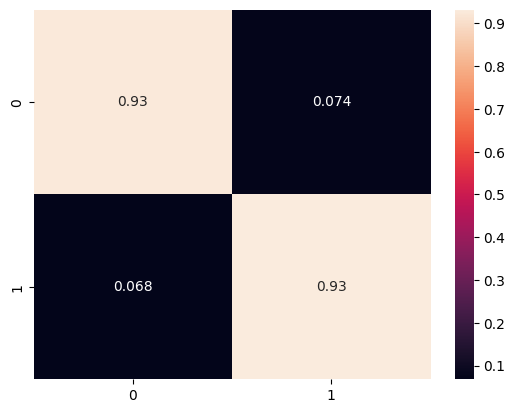

In [102]:

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

Reporte

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       350
           1       0.94      0.93      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [104]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

<span style="color:#1b55e6">
Interpretacion del reporte:
</span>

<span style="color:#1b55e6">
Precision
</span>

<span style="color:#1c1f22">
Para la clase 0 (Cammeo): 0.92
Todas las veces que el modelo predijo que era 'Cammeo', el 92% de las veces estaba en lo correcto.
</span>

<span style="color:#1c1f22">
Todas las veces que el modelo predijo que era 'Osmancik', el 94% de las veces estaba en lo correcto.
</span>

<span style="color:#1b55e6">
Recall
</span>

<span style="color:#1c1f22">
Para la clase 0 (Cammeo): 0.93: El modelo identificó correctamente en el 93% de los casos que es arroz 'Cammeo'.

</span>

<span style="color:#1c1f22">
Para la clase 1 (Osmancik): 0.93
El modelo identificó correctamente en el 93% de los casos que es arroz 'Osmancik'.
</span>

<span style="color:#1b55e6">
F1-Score
</span>

<span style="color:#1c1f22">
Para la clase 0: El F1-score es 0.92, lo que indica un buen balance entre precisión y recall para esta clase.
</span>

<span style="color:#1c1f22">
Para la clase 1: El F1-score es 0.93, lo que indica un rendimiento ligeramente mejor en comparación con la clase 0.</span>

<span style="color:#1b55e6">
Accuracy
</span>

<span style="color:#1c1f22">
El modelo tiene una precisión global del 93%, significa que todas las instancias fueron correctamente clasificadas.</span>

<span style="color:green">
Curva ROC y área bajo la curva (AUC)
</span>

roc_auc_score(y_test, y_pred)

In [21]:
roc_auc_score(y_test, y_pred)

0.928876560332871

AUC (Área Bajo la Curva) Es una medida que varía entre 0 y 1, donde: 1(Indica un modelo perfecto que separa completamente las clases), 0.5(Indica un modelo sin capacidad discriminatoria, equivalente a una clasificación aleatoria), <0.5(Indica un modelo peor que aleatorio, lo cual es poco común en la práctica). AUC de 0.929: Este valor indica que el modelo tiene un excelente poder discriminatorio, es decir, es muy bueno para diferenciar entre las clases positivas y negativas.

In [22]:
y_pred_prob = log_r.predict_proba(X_test_scal)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"tpr":tpr, "fpr":fpr, "threshold":threshold})

,tpr,fpr,threshold
0,0.000000,0.000000,inf
1,0.002427,0.000000,0.999951
2,0.521845,0.000000,0.982315
3,0.521845,0.002857,0.982244
4,0.599515,0.002857,0.973209
...,...,...,...
81,0.995146,0.480000,0.034415
82,0.997573,0.480000,0.034131
83,0.997573,0.500000,0.028817
84,1.000000,0.500000,0.027993


tpr (True Positive Rate), fpr (False Positive Rate), threshold (Umbral)

Text(0.5, 1.0, 'Curva ROC')

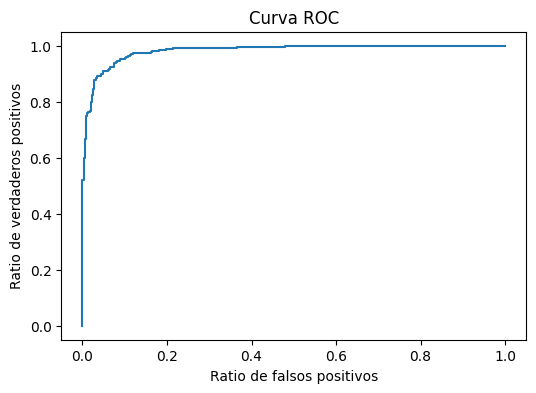

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)

plt.xlabel("Ratio de falsos positivos")
plt.ylabel("Ratio de verdaderos positivos")
plt.title("Curva ROC")

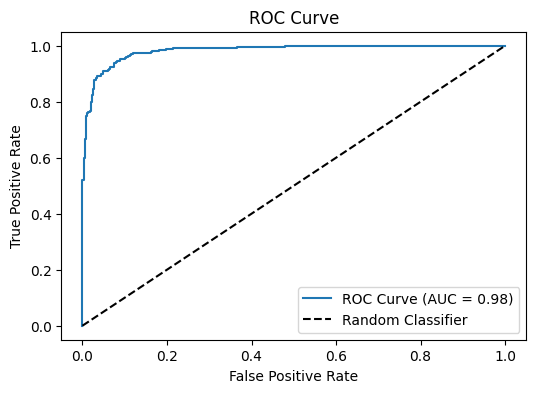

In [24]:
y_prob = log_r.predict_proba(X_test_scal)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

curva P-R

In [25]:
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"prec":prec[1:], "rec":rec[1:], "threshold":thresholds})[80:100]

,prec,rec,threshold
80,0.604993,1.0,0.003704
81,0.605882,1.0,0.003762
82,0.606775,1.0,0.003778
83,0.607670,1.0,0.003833
84,0.608567,1.0,0.003932
85,0.609467,1.0,0.003950
86,0.610370,1.0,0.004160
87,0.611276,1.0,0.004214
88,0.612184,1.0,0.004333
89,0.613095,1.0,0.004355


Text(0.5, 1.0, 'PR Curve')

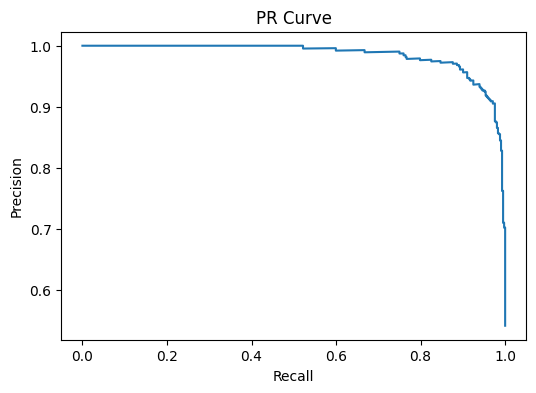

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title("PR Curve")

<span style="color:#1b55e6">

# RandomForest

</span>

USo del GridSearch (busqueda cuadricula)

In [115]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy'] 
       }


In [116]:
rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train_scal,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [117]:
print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test_scal,y_test))

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 800}
Train Score: 0.9278187838165227
Test Score: 0.9238845144356955


Matriz de confusion

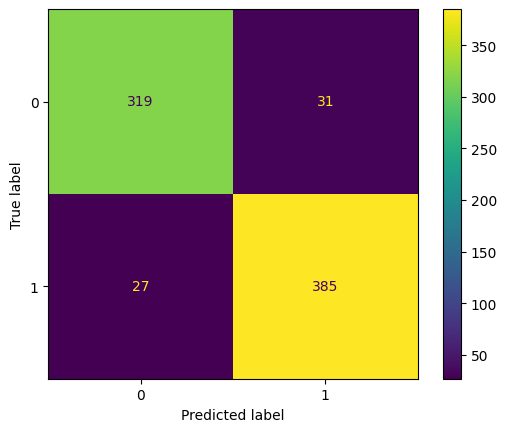

In [118]:
ConfusionMatrixDisplay.from_estimator(rf_cv, X_test_scal, y_test);


In [120]:
p_pred = rf_cv.predict(X_test_scal)
print(classification_report(y_test, p_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       350
           1       0.93      0.93      0.93       412

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



Exportar el modelo

In [121]:
joblib.dump(rf_cv,r'../models/modeloRandomF.pkl')

['../models/modeloRandomF.pkl']

<span style="color:#1b55e6">

# Ensembles Votacion

</span>

Clasificacion por voto

1.- Hard votingClassifier

In [123]:
log_clf = LogisticRegression(max_iter=200, random_state=42) # Mezcla los datos
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42) # Se usa en combinación con otro arg
svm_clf = SVC(gamma="scale", random_state=42)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [124]:
# Train the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42))])

Vemos los aciertos (accuracy score) de todos los clasificadores + el voting classifier

In [125]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9291338582677166
RandomForestClassifier 0.9251968503937008
SVC 0.8792650918635171
VotingClassifier 0.931758530183727


In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bucle para entrenar, predecir y generar reportes para cada clasificador
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    # Entrenar el clasificador con los datos de entrenamiento
    clf.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)
    
    # Imprimir el nombre del clasificador
    print(f"\n{clf.__class__.__name__}:")
    
    # Imprimir la precisión (accuracy)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Imprimir la matriz de confusión
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Imprimir el reporte de clasificación (classification report)
    print("Classification Report:\n", classification_report(y_test, y_pred))


LogisticRegression:
Accuracy: 0.9291338582677166
Confusion Matrix:
 [[320  30]
 [ 24 388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762


RandomForestClassifier:
Accuracy: 0.9251968503937008
Confusion Matrix:
 [[319  31]
 [ 26 386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762


SVC:
Accuracy: 0.8792650918635171
Confusion Matrix:
 [[287  63]
 [ 29 383]]
Classification Report:
          

2.- Probaremos ahora con el `soft` VotingClassifier, es decir, teniendo en cuenta las probabilidades, no los votos.

In [131]:
log_clf = LogisticRegression(max_iter=200, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42) # PROBABILITY = TRUE

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train the model
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [132]:
for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9291338582677166
RandomForestClassifier 0.9251968503937008
SVC 0.8792650918635171
VotingClassifier 0.9251968503937008


In [134]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suponiendo que ya tienes X_train, X_test, y_train, y y_test definidos.

for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    # Entrena el clasificador
    clf.fit(X_train, y_train)
    
    # Predice los valores para el conjunto de prueba
    y_pred = clf.predict(X_test)
    
    # Imprime el nombre de la clase del clasificador
    print(f"\n{clf.__class__.__name__}:")
    
    # Imprime la precisión (accuracy)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Imprime la matriz de confusión
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Imprime el reporte de clasificación
    print("Classification Report:\n", classification_report(y_test, y_pred))



LogisticRegression:
Accuracy: 0.9291338582677166
Confusion Matrix:
 [[320  30]
 [ 24 388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762


RandomForestClassifier:
Accuracy: 0.9251968503937008
Confusion Matrix:
 [[319  31]
 [ 26 386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       350
           1       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762


SVC:
Accuracy: 0.8792650918635171
Confusion Matrix:
 [[287  63]
 [ 29 383]]
Classification Report:
          

# Baggin Classifier

Booststrapping


In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=12,random_state=42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=300, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    max_features = 6, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9356955380577427

In [138]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.9173228346456693


Exportar el modelo

In [139]:
joblib.dump(voting_clf,r'../models/modeloEnsemblesVotacion.pkl')


['../models/modeloEnsemblesVotacion.pkl']

<span style="color:#1b55e6">

# K-vecinos

</span>

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
knn.score(X_train, y_train)

0.9146981627296588

In [142]:
knn.score(X_test, y_test)

0.8858267716535433

In [143]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print('K=',k)
    print("Train: ", knn.score(X_train, y_train))
    print("Test ", knn.score(X_test, y_test))
    print('-'*50)

K= 1
Train:  1.0
Test  0.8740157480314961
--------------------------------------------------
K= 2
Train:  0.9373359580052494
Test  0.8595800524934383
--------------------------------------------------
K= 3
Train:  0.9337270341207349
Test  0.8937007874015748
--------------------------------------------------
K= 4
Train:  0.9202755905511811
Test  0.8779527559055118
--------------------------------------------------
K= 5
Train:  0.9146981627296588
Test  0.8858267716535433
--------------------------------------------------
K= 6
Train:  0.9114173228346457
Test  0.8805774278215223
--------------------------------------------------
K= 7
Train:  0.9035433070866141
Test  0.8858267716535433
--------------------------------------------------
K= 8
Train:  0.9051837270341208
Test  0.8779527559055118
--------------------------------------------------
K= 9
Train:  0.8992782152230971
Test  0.884514435695538
--------------------------------------------------
K= 10
Train:  0.8976377952755905
Test  0.881

In [145]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       350
           1       0.87      0.92      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.88      0.88       762
weighted avg       0.88      0.88      0.88       762



Matriz de confusión

In [146]:
confusion_matrix(y_test, knn.predict(X_test))

array([[295,  55],
       [ 35, 377]], dtype=int64)

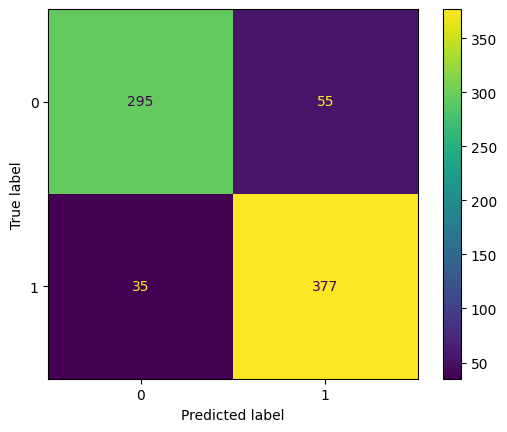

In [147]:

cm = confusion_matrix(y_test, knn.predict(X_test), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()

Exportar modelo

In [150]:
joblib.dump(knn,r'../models/modeloKvecinos.pkl')

['../models/modeloKvecinos.pkl']

<span style="color:#1b55e6">

# SVM (Support Vector Machines)


</span>

General el modelo (usar un Kernel lineal)

In [160]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [162]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluar el modelo

In [163]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.931758530183727
Precision: 0.9265402843601895
Recall: 0.9490291262135923


In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       350
           1       0.93      0.95      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



Exportar el modelo

In [165]:
joblib.dump(clf,r'../models/modeloSVM.pkl')

['../models/modeloSVM.pkl']

<span style="color:#1b55e6">

# PCA (No supervisado)

</span>

In [166]:
n_comp = 7

pca = PCA(n_components=n_comp)
pca.fit(X_train_scal)

PCA(n_components=7)

# Varianza


1.- Varianza para cada uno de los componentes

In [167]:
pca.explained_variance_

array([4.57878236e+00, 1.50984894e+00, 8.93202593e-01, 1.16848928e-02,
       6.29917390e-03, 2.04925186e-03, 4.30126144e-04])

2.- Porcentaje de la varianza

In [168]:
pca.explained_variance_ratio_

array([6.53897163e-01, 2.15621940e-01, 1.27558507e-01, 1.66872274e-03,
       8.99586749e-04, 2.92654218e-04, 6.14264324e-05])

<span style="color:#1b55e6">
Esto significa lo siguiente:

Primer componente principal (PC1): Explica aproximadamente el 65.39% de la varianza total.

Segundo componente principal (PC2): Explica aproximadamente el 21.56% de la varianza total.

Tercer componente principal (PC3): Explica aproximadamente el 12.76% de la varianza total.

Cuarto componente principal (PC4): Explica aproximadamente el 0.17% de la varianza total.

Quinto componente principal (PC5): Explica aproximadamente el 0.09% de la varianza total.

Sexto componente principal (PC6): Explica aproximadamente el 0.03% de la varianza total.

Séptimo componente principal (PC7): Explica aproximadamente el 0.006% de la varianza total.

Este array sugiere que los primeros tres componentes capturan la mayor parte de la varianza en los datos (casi el 99% en total), lo que indica que una gran parte de la estructura de los datos puede describirse con solo esos tres componentes. Los componentes restantes explican una cantidad muy pequeña de la varianza, lo que sugiere que pueden ser menos importantes para entender la variabilidad en los datos.
</span>

3.- Suma acumulada de la varianza

In [169]:
pca.explained_variance_ratio_.cumsum()

array([0.65389716, 0.8695191 , 0.99707761, 0.99874633, 0.99964592,
       0.99993857, 1.        ])

<span style="color:#1b55e6">
Esto significa:

Después del primer componente (PC1): Se ha explicado el 65.39% de la varianza total.

Después del segundo componente (PC2): Se ha explicado el 86.95% de la varianza total.

Después del tercer componente (PC3): Se ha explicado el 99.71% de la varianza total.

Después del cuarto componente (PC4): Se ha explicado el 99.87% de la varianza total.

Después del quinto componente (PC5): Se ha explicado el 99.96% de la varianza total.

Después del sexto componente (PC6): Se ha explicado el 99.99% de la varianza total.

Después del séptimo componente (PC7): Se ha explicado el 100% de la varianza total.
Esto significa que con los primeros tres componentes principales, ya has capturado casi toda la varianza en los datos (99.71%), lo que indica que esos tres componentes son suficientes para representar prácticamente toda la información contenida en los datos originales. Los componentes adicionales añaden muy poca información adicional, lo que sugiere que son menos relevantes para el análisis.
</span>

In [170]:
#ME quedo con 3 features y mas nada
pca.explained_variance_ratio_.cumsum()[:3]

array([0.65389716, 0.8695191 , 0.99707761])

<span style="color:#1b55e6">
Con solo los primeros tres componentes principales, se ha capturado casi toda la varianza (99.71%) presente en los datos originales.


Esto indica que estos tres componentes principales son suficientes para representar casi toda la información relevante del conjunto de datos, lo que sugiere que se puede reducir la dimensionalidad del conjunto de datos de manera efectiva utilizando solo estos tres componentes.
</span>

Text(0, 0.5, 'Ratio de varianza acumulada')

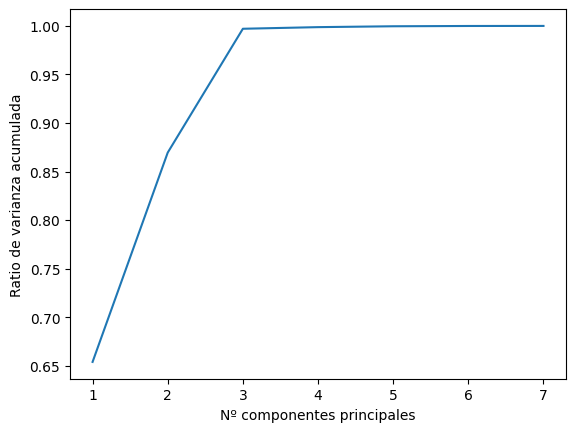

In [171]:
#Varianza acumulada
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,8)))
plt.xlabel("Nº componentes principales")
plt.ylabel("Ratio de varianza acumulada")

Veamos la correlación entre las nuevas componentes y las dimensiones originales

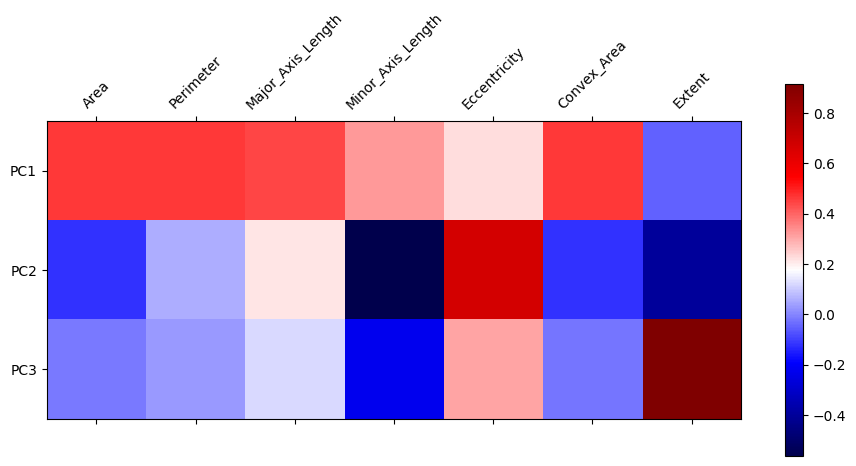

In [172]:
plt.matshow(pca.components_[:3], cmap="seismic")
plt.yticks([0,1,2], ['PC1', "PC2",'PC3']);
plt.xticks(range(len(X.columns)), X.columns, rotation=45);
plt.colorbar()

In [173]:
pd.DataFrame(pca.components_[:3], columns=X.columns, index=['PC1', "PC2",'PC3'])

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
PC1,0.461409,0.464512,0.447204,0.321905,0.227269,0.461850,-0.052528
PC2,-0.122923,0.056154,0.211917,-0.562910,0.668731,-0.120827,-0.397692
PC3,-0.016679,0.026834,0.123586,-0.223313,0.308137,-0.021832,0.915661


In [174]:


pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression())])

In [175]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression())])

In [176]:
y_pred = pipe.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9304461942257218
confusion_matrix
 [[324  26]
 [ 27 385]]


In [177]:

pipe_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier())
])
pipe_rf

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier())])

In [178]:
pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9251968503937008
confusion_matrix
 [[318  32]
 [ 25 387]]


In [187]:
pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.926509186351706
confusion_matrix
 [[319  31]
 [ 25 387]]


Gridserch

In [179]:
params_log = {
    "pca__n_components": [4,5,6],
    "classifier__C": [0.1,1,10]
}

params_rf = {
    "scaler" : [StandardScaler(), None],
    "pca__n_components": [4,5,6],
    "classifier": [RandomForestClassifier()],
    "classifier__max_depth": [2,3,4,5]
}

params = [params_log, params_rf]

In [180]:
gs = GridSearchCV(pipe, params, cv=10, scoring="recall")
gs.fit(X_train, y_train)

c:\Users\flor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': [0.1, 1, 10],
                          'pca__n_components': [4, 5, 6]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [2, 3, 4, 5],
                          'pca__n_components': [4, 5, 6],
                          'scaler': [StandardScaler(), None]}],
             scoring='recall')

In [181]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'classifier': RandomForestClassifier(), 'classifier__max_depth': 3, 'pca__n_components': 6, 'scaler': None}
0.9468188238315356
Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=6)),
                ('classifier', RandomForestClassifier(max_depth=3))])


In [182]:
final_model = gs.best_estimator_.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9146981627296588
confusion_matrix
 [[302  48]
 [ 17 395]]


In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       350
           1       0.89      0.96      0.92       412

    accuracy                           0.91       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.91      0.91       762



exportar el modelo (Esto es otra forma, la anterior es con joblib)

In [184]:
import pickle

final_model = gs.best_estimator_.fit(X, y)

with open(r'../models/modeloNoSupervPCA.pkl', "wb") as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [185]:
with open(r'../models/modeloNoSupervPCA.pkl', "rb") as archivo_salida:
    modelo_leido = pickle.load(archivo_salida)

In [186]:
modelo_leido.predict_proba(X_test)

array([[0.38508493, 0.61491507],
       [0.14940554, 0.85059446],
       [0.16549167, 0.83450833],
       ...,
       [0.19414406, 0.80585594],
       [0.85204194, 0.14795806],
       [0.83269412, 0.16730588]])